# Study Gradient Descent

在 Andrew Ng 的机器学习视频中，提到了一个重要的算法“梯度下降”算法（Gradient Descent Algorithm），该算法用于线性回归模型（linear regression），其背后所应用的数学理念一直很难理解，通过网上的这篇 [Gradient Descent Derivation](https://mccormickml.com/2014/03/04/gradient-descent-derivation/) 文章，终于对其背后的数学理念以及如何应用到线性回归模型有所理解，在此记录下来，以备查阅。

梯度下降所需要的数学知识如下：
- 导数 Derivative
- 导数法则
- 偏导数 Partial Derivative

为了便于理解，使用 python 进行了算法实现和图形化展示，关于 python 所需要的包如下
- numpy
- matplotlib
- pandas

## Linear Regression

对于线性回归模型，有一个线性假设函数 $h(x)=\theta_0+\theta_1x$，线性回归模型所要解决的问题就是找到一个合适的$\theta_0$和$\theta_1$的值，使得线性假设函数最适合训练集数据。

梯度下降算法就是用于去找到合适的$\theta_0$和$\theta_1$的值的方法。

## MSE Cost Function

MSE 是 mean squared error 的缩写，即“平均乘方误差”，MSE Cost Function 表示“平均乘方误差成本函数”，数学公式表示如下：

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})
$$

- $J(\theta)$: cost function $J$ 在给定的 $\theta$ 情况下的结果
- $m$: 样本数量
- $x^{(i)}$: 训练集的第$i$个输入向量
- $y^{(i)}$: 训练集的第$i$个输出分类标志（就是target）
- $\theta$: 选择的参数值或权重（$\theta_0 \theta_1 \theta_2 ...$）
- $(h_{\theta}(x^{(i)})$: 在给定的 $\theta$ 情况下，训练集的第$i$个样本的预测结果（这里用的就是线性假设函数 $h(x)=\theta_0+\theta_1x$ 计算出的结果）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
def normalization_min_max(p_serial):
    v_max = p_serial.max()
    v_min = p_serial.min()
    v_diff = v_max - v_min
    return p_serial.apply(lambda x: round((x - v_min) / v_diff, 2))

def plot_line(p_plt, p_a, p_b, p_label):
    x = np.linspace(0, 1, 100)
    y = p_a + p_b * x
    p_plt.plot(x, y, label=p_label)

def iterate_theta(theta0, theta1, learning_rate, x, y):
    predict_price = theta0 + theta1 * x;
    new_theta0 = theta0 - (predict_price - y).sum() / predict_price.size
    new_theta1 = theta1 - ((predict_price * x - y * x).sum() / predict_price.size)
    return round(new_theta0, 2), round(new_theta1, 2)

In [5]:
house_size = [1100, 1400, 1425, 1550, 1600, 1700, 1700, 1875, 2350, 2450]
house_price = [199000, 245000, 319000, 240000, 312000, 279000, 310000, 308000, 405000, 324000]

house_df = pd.DataFrame({'house_size': house_size, 'house_price': house_price})
house_df

,house_size,house_price
0,1100,199000
1,1400,245000
2,1425,319000
3,1550,240000
4,1600,312000
5,1700,279000
6,1700,310000
7,1875,308000
8,2350,405000
9,2450,324000


In [6]:
house_df['normalization_size'] = normalization_min_max(house_df.house_size)
house_df['normalization_price'] = normalization_min_max(house_df.house_price)
house_df

,house_size,house_price,normalization_size,normalization_price
0,1100,199000,0.00,0.00
1,1400,245000,0.22,0.22
2,1425,319000,0.24,0.58
3,1550,240000,0.33,0.20
4,1600,312000,0.37,0.55
5,1700,279000,0.44,0.39
6,1700,310000,0.44,0.54
7,1875,308000,0.57,0.53
8,2350,405000,0.93,1.00
9,2450,324000,1.00,0.61


In [44]:
a, b = 0, 0
for x in range(28):
    print( \
          '{:<15}'.format(f"theta0 = {a}") + \
          '{:<15}'.format(f"theta1 = {b}") + \
          f"SSE = {((a + b * house_df.normalization_size) - house_df.normalization_price).pow(2).sum()}")
    a, b = iterate_theta(a, b, 0.01, house_df.normalization_size, house_df.normalization_price)
    

theta0 = 0     theta1 = 0     SSE = 2.8240000000000003
theta0 = 0.46  theta1 = 0.27  SSE = 0.5683095199999999
theta0 = 0.34  theta1 = 0.25  SSE = 0.43905
theta0 = 0.35  theta1 = 0.29  SSE = 0.41206008000000005
theta0 = 0.33  theta1 = 0.32  SSE = 0.38918112
theta0 = 0.32  theta1 = 0.35  SSE = 0.37105800000000005
theta0 = 0.3   theta1 = 0.37  SSE = 0.35661671999999994
theta0 = 0.29  theta1 = 0.4   SSE = 0.340568
theta0 = 0.28  theta1 = 0.42  SSE = 0.33019231999999993
theta0 = 0.27  theta1 = 0.44  SSE = 0.32052768
theta0 = 0.26  theta1 = 0.46  SSE = 0.31157408000000003
theta0 = 0.25  theta1 = 0.48  SSE = 0.30333152
theta0 = 0.24  theta1 = 0.5   SSE = 0.2958
theta0 = 0.24  theta1 = 0.52  SSE = 0.29079552
theta0 = 0.23  theta1 = 0.53  SSE = 0.2864479199999999
theta0 = 0.22  theta1 = 0.54  SSE = 0.28287007999999997
theta0 = 0.22  theta1 = 0.55  SSE = 0.280602
theta0 = 0.21  theta1 = 0.56  SSE = 0.27747167999999994
theta0 = 0.21  theta1 = 0.57  SSE = 0.27546712
theta0 = 0.2   theta1 = 0.58  S

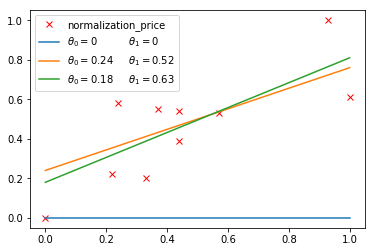

In [74]:
plt.plot(house_df.normalization_size, house_df.normalization_price, 'rx')
plot_line(plt, 0, 0, '{:<22}'.format(r'$\theta_0=0$') + r'$\theta_1=0$')
plot_line(plt, 0.24, 0.52, '{:<20}'.format(r'$\theta_0=0.24$') + r'$\theta_1=0.52$')
plot_line(plt, 0.18, 0.63, '{:<20}'.format(r'$\theta_0=0.18$') + r'$\theta_1=0.63$')
plt.legend()